In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout
from keras.applications import MobileNetV2
from keras import Model
import os
import random
from joblib import load, dump

tf.keras.backend.set_floatx('float32')

2023-03-16 02:59:51.938785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 02:59:52.619880: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 02:59:52.619958: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-16 02:59:54.765714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# %run create_data.py

2023-03-13 12:16:04.383755: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-13 12:16:04.384379: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-13 12:16:04.384432: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shree): /proc/driver/nvidia/version does not exist
2023-03-13 12:16:04.387596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
base_model = MobileNetV2(include_top=False, input_shape=(120,120,3))

2023-03-16 02:59:57.984397: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-16 02:59:57.984425: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-16 02:59:57.984450: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shree): /proc/driver/nvidia/version does not exist
2023-03-16 02:59:57.985750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 60, 60, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 60, 60, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 60, 60, 32)   0           ['bn_Conv1[0][

In [3]:
train_layers = ["Conv_1", "out_relu"]

for layer in base_model.layers:
    layer.trainable = layer.name in train_layers
    if layer.name in train_layers:
        print(layer.name)

Conv_1
out_relu


In [4]:
def mat_shuffle(matrixs):
    widths = np.cumsum([0]+[matrix.shape[1] for matrix in matrixs])
    big = np.hstack(matrixs)
    np.random.shuffle(big)
    return [big[:,widths[i]:widths[i+1]].copy() for i in range(len(matrixs))]

The labels of each face image is embedded in the file name, formated like [age]\_[gender]\_[race]\_[date&time].jpg

[age] is an integer from 0 to 116, indicating the age
[gender] is either 0 (male) or 1 (female)
[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [4]:
x = Flatten()(base_model.output)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)

model = Model(base_model.input, x)
model.compile(optimizer=Adam(),
              loss='mse')

In [11]:
del images
del ages

Epoch 1/4


2023-03-16 03:00:09.789058: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 685670400 exceeds 10% of free system memory.


62/62 [==============================] - 38s 560ms/step - loss: 319.0684 - val_loss: 127.8685
Epoch 2/4
62/62 [==============================] - 38s 622ms/step - loss: 124.8300 - val_loss: 117.4315
Epoch 3/4
62/62 [==============================] - 33s 535ms/step - loss: 107.1090 - val_loss: 110.9955
Epoch 4/4
62/62 [==============================] - 38s 613ms/step - loss: 91.9374 - val_loss: 112.1569
Epoch 1/4


2023-03-16 03:02:38.618919: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 685670400 exceeds 10% of free system memory.


62/62 [==============================] - 35s 562ms/step - loss: 115.6142 - val_loss: 128.3538
Epoch 2/4
62/62 [==============================] - 32s 515ms/step - loss: 95.9920 - val_loss: 114.4322
Epoch 3/4
62/62 [==============================] - 32s 519ms/step - loss: 80.6349 - val_loss: 120.9956
Epoch 4/4
62/62 [==============================] - 32s 517ms/step - loss: 73.5641 - val_loss: 110.1798


2023-03-16 03:05:01.126566: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 857088000 exceeds 10% of free system memory.


155/155 [==============================] - 30s 186ms/step


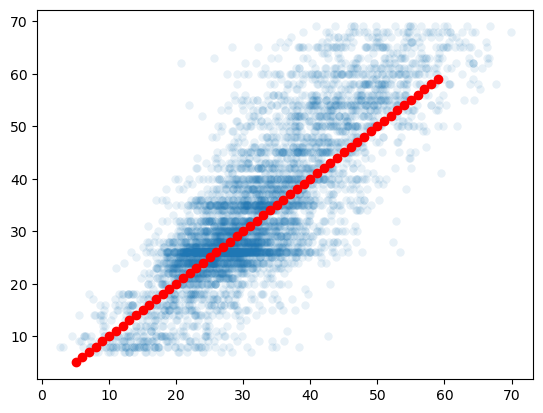

INFO:tensorflow:Assets written to: 0_model.pkl/assets


INFO:tensorflow:Assets written to: 0_model.pkl/assets


Epoch 1/4


2023-03-16 03:05:54.023117: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 685670400 exceeds 10% of free system memory.


62/62 [==============================] - 32s 519ms/step - loss: 122.4548 - val_loss: 101.4463
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 94.4083 - val_loss: 100.6762
Epoch 3/4
62/62 [==============================] - 32s 517ms/step - loss: 81.7642 - val_loss: 101.0775
Epoch 4/4
62/62 [==============================] - 32s 514ms/step - loss: 70.8916 - val_loss: 109.4628
Epoch 1/4


2023-03-16 03:08:03.594344: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 685670400 exceeds 10% of free system memory.


62/62 [==============================] - 34s 550ms/step - loss: 101.0383 - val_loss: 103.9554
Epoch 2/4
62/62 [==============================] - 32s 520ms/step - loss: 82.9485 - val_loss: 107.2106
Epoch 3/4
62/62 [==============================] - 32s 512ms/step - loss: 75.6351 - val_loss: 107.9455
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


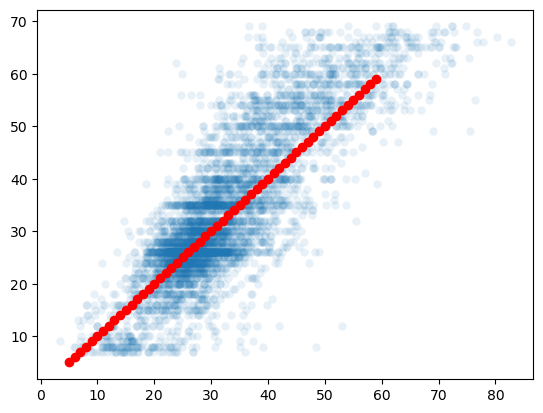

INFO:tensorflow:Assets written to: 0_model.pkl/assets


INFO:tensorflow:Assets written to: 0_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 515ms/step - loss: 124.1809 - val_loss: 93.9331
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 95.7116 - val_loss: 91.3689
Epoch 3/4
62/62 [==============================] - 32s 521ms/step - loss: 82.5350 - val_loss: 91.0813
Epoch 4/4
62/62 [==============================] - 32s 512ms/step - loss: 67.9261 - val_loss: 90.0251
Epoch 1/4
62/62 [==============================] - 32s 519ms/step - loss: 99.4866 - val_loss: 92.4731
Epoch 2/4
62/62 [==============================] - 32s 511ms/step - loss: 81.2690 - val_loss: 92.0748
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 68.3104 - val_loss: 95.1740
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


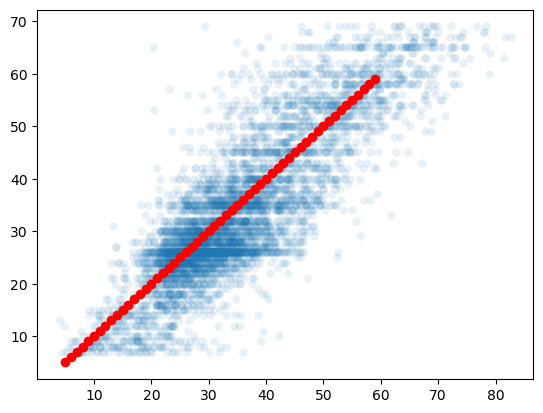

INFO:tensorflow:Assets written to: 0_model.pkl/assets


INFO:tensorflow:Assets written to: 0_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 34s 514ms/step - loss: 119.5607 - val_loss: 125.7081
Epoch 2/4
63/63 [==============================] - 32s 513ms/step - loss: 113.4893 - val_loss: 100.7963
Epoch 3/4
63/63 [==============================] - 33s 522ms/step - loss: 91.5193 - val_loss: 175.4368
Epoch 4/4
63/63 [==============================] - 32s 507ms/step - loss: 113.9423 - val_loss: 91.9823
Epoch 1/4
63/63 [==============================] - 32s 516ms/step - loss: 117.9495 - val_loss: 97.8475
Epoch 2/4
63/63 [==============================] - 32s 506ms/step - loss: 98.4841 - val_loss: 90.1777
Epoch 3/4
63/63 [==============================] - 32s 509ms/step - loss: 85.7083 - val_loss: 100.7870
Epoch 4/4
156/156 [==============================] - 28s 174ms/step


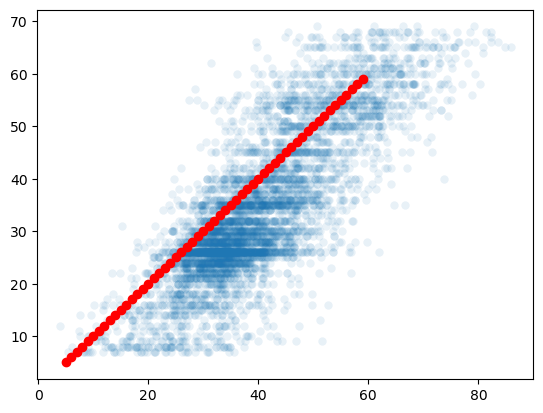

INFO:tensorflow:Assets written to: 0_model.pkl/assets


INFO:tensorflow:Assets written to: 0_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 526ms/step - loss: 139.1337 - val_loss: 108.5207
Epoch 2/4
62/62 [==============================] - 32s 516ms/step - loss: 97.8428 - val_loss: 96.4401
Epoch 3/4
62/62 [==============================] - 33s 527ms/step - loss: 86.8984 - val_loss: 94.3991
Epoch 4/4
62/62 [==============================] - 32s 519ms/step - loss: 79.3559 - val_loss: 95.7101
Epoch 1/4
62/62 [==============================] - 33s 533ms/step - loss: 100.9398 - val_loss: 101.7267
Epoch 2/4
62/62 [==============================] - 32s 520ms/step - loss: 82.0594 - val_loss: 97.5598
Epoch 3/4
62/62 [==============================] - 32s 518ms/step - loss: 74.6412 - val_loss: 102.7289
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


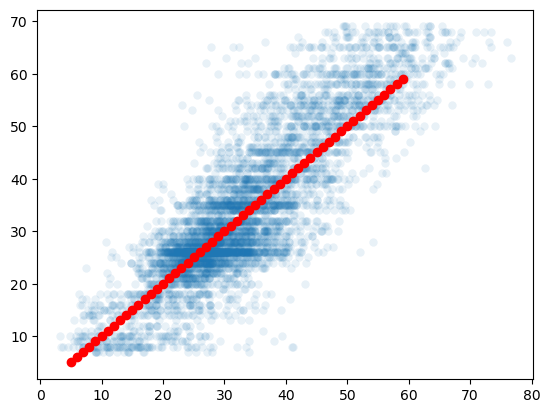

INFO:tensorflow:Assets written to: 1_model.pkl/assets


INFO:tensorflow:Assets written to: 1_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 522ms/step - loss: 106.2013 - val_loss: 95.9615
Epoch 2/4
62/62 [==============================] - 33s 527ms/step - loss: 88.4463 - val_loss: 113.9246
Epoch 3/4
62/62 [==============================] - 33s 526ms/step - loss: 72.4501 - val_loss: 97.4220
Epoch 4/4
62/62 [==============================] - 32s 516ms/step - loss: 66.3393 - val_loss: 95.3485
Epoch 1/4
62/62 [==============================] - 32s 521ms/step - loss: 93.5018 - val_loss: 112.8667
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 77.3521 - val_loss: 101.2998
Epoch 3/4
62/62 [==============================] - 32s 518ms/step - loss: 64.9867 - val_loss: 106.4341
Epoch 4/4
155/155 [==============================] - 28s 177ms/step


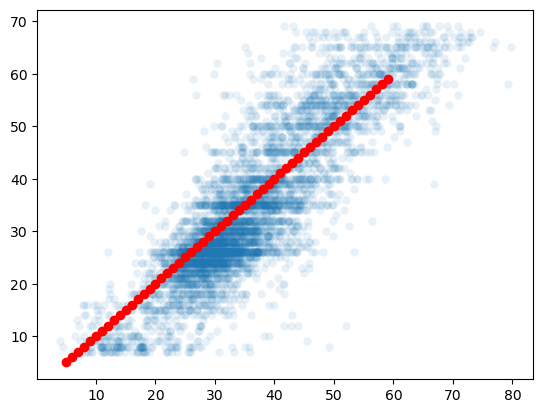

INFO:tensorflow:Assets written to: 1_model.pkl/assets


INFO:tensorflow:Assets written to: 1_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 541ms/step - loss: 106.7687 - val_loss: 90.6211
Epoch 2/4
62/62 [==============================] - 33s 529ms/step - loss: 80.7345 - val_loss: 89.7482
Epoch 3/4
62/62 [==============================] - 33s 528ms/step - loss: 70.4612 - val_loss: 89.0329
Epoch 4/4
62/62 [==============================] - 32s 519ms/step - loss: 58.6503 - val_loss: 93.8821
Epoch 1/4
62/62 [==============================] - 33s 532ms/step - loss: 87.5280 - val_loss: 94.3738
Epoch 2/4
62/62 [==============================] - 32s 513ms/step - loss: 71.4221 - val_loss: 91.6083
Epoch 3/4
62/62 [==============================] - 32s 519ms/step - loss: 59.5086 - val_loss: 89.9295
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


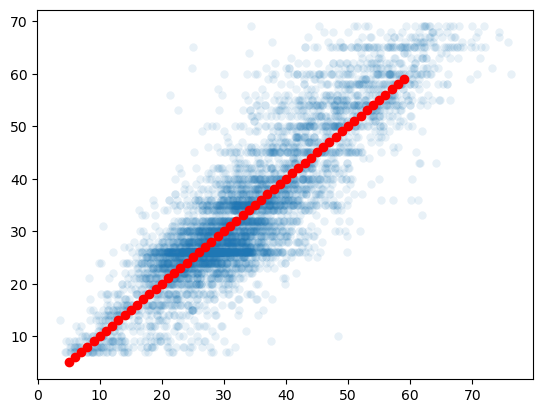

INFO:tensorflow:Assets written to: 1_model.pkl/assets


INFO:tensorflow:Assets written to: 1_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 510ms/step - loss: 99.5713 - val_loss: 91.3109
Epoch 2/4
63/63 [==============================] - 32s 504ms/step - loss: 85.7003 - val_loss: 106.6109
Epoch 3/4
63/63 [==============================] - 32s 512ms/step - loss: 72.2313 - val_loss: 84.8616
Epoch 4/4
63/63 [==============================] - 32s 514ms/step - loss: 61.8743 - val_loss: 87.4436
Epoch 1/4
63/63 [==============================] - 32s 514ms/step - loss: 84.6465 - val_loss: 115.9670
Epoch 2/4
63/63 [==============================] - 32s 515ms/step - loss: 88.9435 - val_loss: 90.2421
Epoch 3/4
63/63 [==============================] - 32s 512ms/step - loss: 68.7925 - val_loss: 91.1232
Epoch 4/4
156/156 [==============================] - 28s 177ms/step


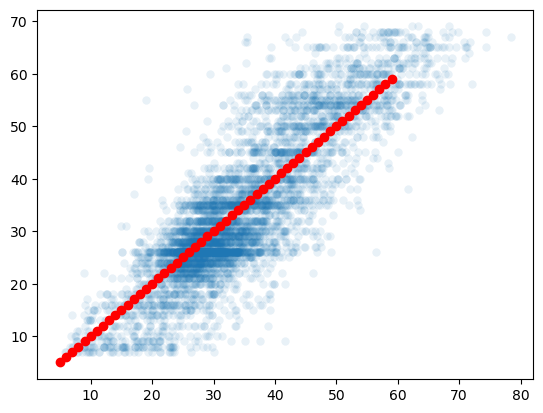

INFO:tensorflow:Assets written to: 1_model.pkl/assets


INFO:tensorflow:Assets written to: 1_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 517ms/step - loss: 111.4932 - val_loss: 108.0100
Epoch 2/4
62/62 [==============================] - 32s 518ms/step - loss: 84.4278 - val_loss: 98.0396
Epoch 3/4
62/62 [==============================] - 32s 519ms/step - loss: 67.1920 - val_loss: 95.9566
Epoch 4/4
62/62 [==============================] - 32s 512ms/step - loss: 63.8356 - val_loss: 94.7290
Epoch 1/4
62/62 [==============================] - 32s 515ms/step - loss: 82.6001 - val_loss: 99.1892
Epoch 2/4
62/62 [==============================] - 32s 513ms/step - loss: 69.2130 - val_loss: 98.9816
Epoch 3/4
62/62 [==============================] - 31s 509ms/step - loss: 58.9268 - val_loss: 95.9463
Epoch 4/4
155/155 [==============================] - 27s 177ms/step


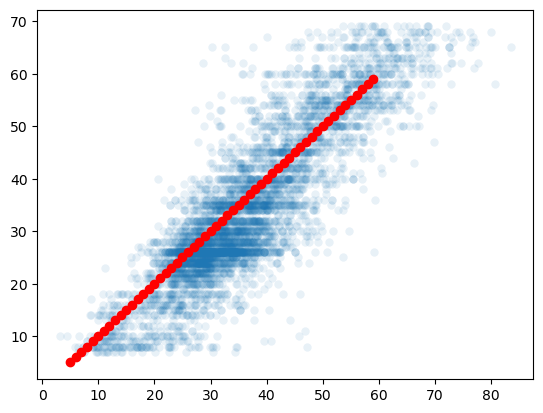

INFO:tensorflow:Assets written to: 2_model.pkl/assets


INFO:tensorflow:Assets written to: 2_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 517ms/step - loss: 93.3821 - val_loss: 104.8685
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 74.7151 - val_loss: 98.1752
Epoch 3/4
62/62 [==============================] - 32s 518ms/step - loss: 63.6634 - val_loss: 104.4854
Epoch 4/4
62/62 [==============================] - 32s 516ms/step - loss: 56.3773 - val_loss: 101.6177
Epoch 1/4
62/62 [==============================] - 32s 525ms/step - loss: 82.2329 - val_loss: 98.5605
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 66.5975 - val_loss: 102.6008
Epoch 3/4
62/62 [==============================] - 32s 516ms/step - loss: 57.7859 - val_loss: 101.7248
Epoch 4/4
155/155 [==============================] - 27s 175ms/step


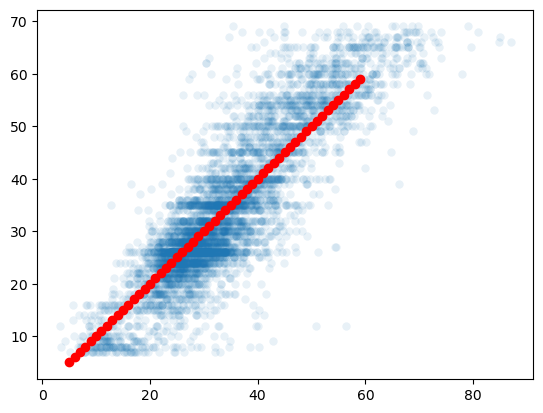

INFO:tensorflow:Assets written to: 2_model.pkl/assets


INFO:tensorflow:Assets written to: 2_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 522ms/step - loss: 89.8170 - val_loss: 86.8676
Epoch 2/4
62/62 [==============================] - 32s 526ms/step - loss: 67.0055 - val_loss: 86.2262
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 57.9846 - val_loss: 87.3694
Epoch 4/4
62/62 [==============================] - 32s 522ms/step - loss: 51.5289 - val_loss: 88.2808
Epoch 1/4
62/62 [==============================] - 33s 528ms/step - loss: 73.9189 - val_loss: 102.8896
Epoch 2/4
62/62 [==============================] - 32s 522ms/step - loss: 65.2740 - val_loss: 91.9930
Epoch 3/4
62/62 [==============================] - 32s 516ms/step - loss: 56.0014 - val_loss: 95.6220
Epoch 4/4
155/155 [==============================] - 30s 191ms/step


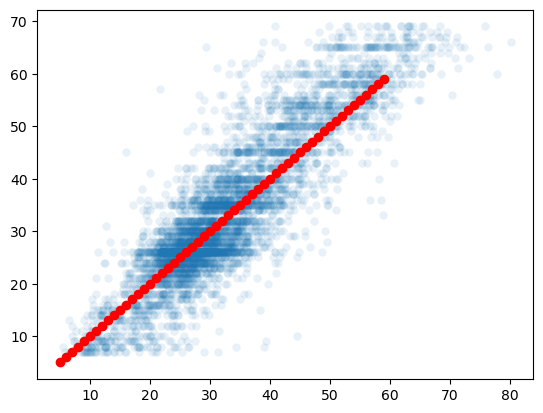

INFO:tensorflow:Assets written to: 2_model.pkl/assets


INFO:tensorflow:Assets written to: 2_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 33s 524ms/step - loss: 87.4133 - val_loss: 96.4013
Epoch 2/4
63/63 [==============================] - 32s 510ms/step - loss: 72.0356 - val_loss: 89.7810
Epoch 3/4
63/63 [==============================] - 32s 512ms/step - loss: 66.0081 - val_loss: 91.3316
Epoch 4/4
63/63 [==============================] - 32s 514ms/step - loss: 71.6669 - val_loss: 84.1950
Epoch 1/4
63/63 [==============================] - 32s 514ms/step - loss: 78.1739 - val_loss: 104.0520
Epoch 2/4
63/63 [==============================] - 32s 510ms/step - loss: 75.4904 - val_loss: 101.6066
Epoch 3/4
63/63 [==============================] - 32s 506ms/step - loss: 59.7545 - val_loss: 87.6197
Epoch 4/4
156/156 [==============================] - 28s 175ms/step


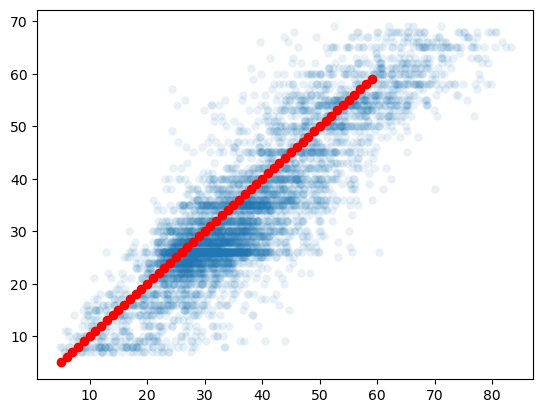

INFO:tensorflow:Assets written to: 2_model.pkl/assets


INFO:tensorflow:Assets written to: 2_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 521ms/step - loss: 99.0576 - val_loss: 104.8432
Epoch 2/4
62/62 [==============================] - 32s 510ms/step - loss: 72.0941 - val_loss: 98.2261
Epoch 3/4
62/62 [==============================] - 32s 522ms/step - loss: 65.4358 - val_loss: 96.0000
Epoch 4/4
62/62 [==============================] - 32s 523ms/step - loss: 55.8004 - val_loss: 96.2200
Epoch 1/4
62/62 [==============================] - 32s 525ms/step - loss: 75.9944 - val_loss: 93.6983
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 67.3191 - val_loss: 96.0884
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 54.6870 - val_loss: 96.8628
Epoch 4/4
155/155 [==============================] - 27s 172ms/step


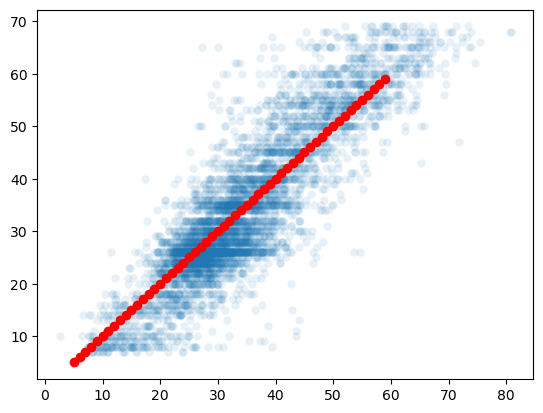

INFO:tensorflow:Assets written to: 3_model.pkl/assets


INFO:tensorflow:Assets written to: 3_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 533ms/step - loss: 86.9655 - val_loss: 98.6813
Epoch 2/4
62/62 [==============================] - 32s 525ms/step - loss: 64.6924 - val_loss: 102.8658
Epoch 3/4
62/62 [==============================] - 32s 524ms/step - loss: 58.4577 - val_loss: 96.5630
Epoch 4/4
62/62 [==============================] - 33s 527ms/step - loss: 50.3405 - val_loss: 99.4384
Epoch 1/4
62/62 [==============================] - 33s 530ms/step - loss: 70.9553 - val_loss: 96.1858
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 59.1171 - val_loss: 97.3816
Epoch 3/4
62/62 [==============================] - 32s 518ms/step - loss: 53.7838 - val_loss: 100.9551
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


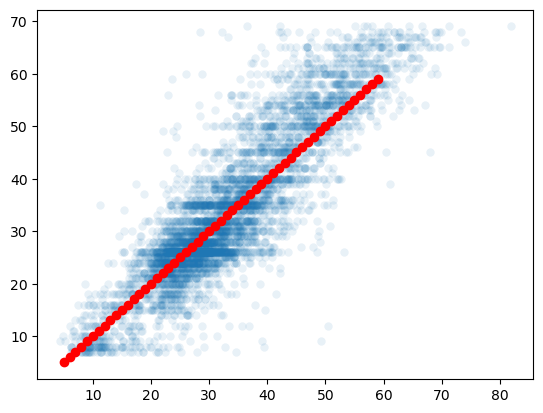

INFO:tensorflow:Assets written to: 3_model.pkl/assets


INFO:tensorflow:Assets written to: 3_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 530ms/step - loss: 82.7248 - val_loss: 86.0752
Epoch 2/4
62/62 [==============================] - 32s 525ms/step - loss: 62.8454 - val_loss: 86.2510
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 53.7955 - val_loss: 84.8351
Epoch 4/4
62/62 [==============================] - 32s 518ms/step - loss: 49.8249 - val_loss: 86.8931
Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 66.0657 - val_loss: 105.5389
Epoch 2/4
62/62 [==============================] - 32s 519ms/step - loss: 55.9459 - val_loss: 90.9204
Epoch 3/4
62/62 [==============================] - 32s 515ms/step - loss: 47.8458 - val_loss: 88.5837
Epoch 4/4
155/155 [==============================] - 27s 176ms/step


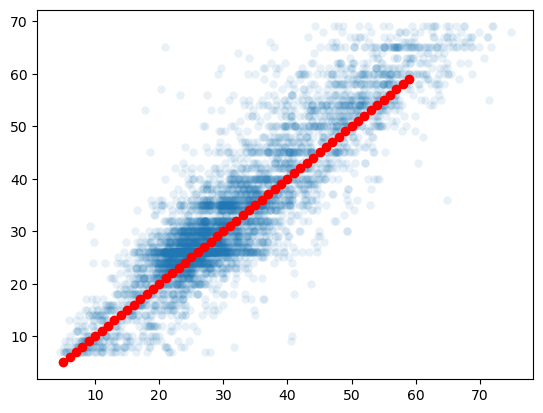

INFO:tensorflow:Assets written to: 3_model.pkl/assets


INFO:tensorflow:Assets written to: 3_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 33s 520ms/step - loss: 76.3100 - val_loss: 81.5860
Epoch 2/4
63/63 [==============================] - 32s 517ms/step - loss: 60.2000 - val_loss: 101.1200
Epoch 3/4
63/63 [==============================] - 32s 516ms/step - loss: 59.4096 - val_loss: 87.9287
Epoch 4/4
63/63 [==============================] - 32s 508ms/step - loss: 48.5488 - val_loss: 84.9999
Epoch 1/4
63/63 [==============================] - 32s 515ms/step - loss: 70.6218 - val_loss: 88.4649
Epoch 2/4
63/63 [==============================] - 32s 511ms/step - loss: 72.8385 - val_loss: 84.2921
Epoch 3/4
63/63 [==============================] - 32s 510ms/step - loss: 51.8772 - val_loss: 109.2687
Epoch 4/4
156/156 [==============================] - 27s 175ms/step


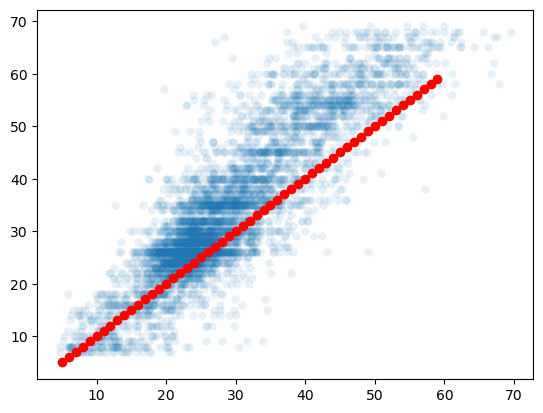

INFO:tensorflow:Assets written to: 3_model.pkl/assets


INFO:tensorflow:Assets written to: 3_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 88.9752 - val_loss: 92.8322
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 63.3302 - val_loss: 95.2350
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 57.7958 - val_loss: 94.0386
Epoch 4/4
62/62 [==============================] - 32s 523ms/step - loss: 47.3510 - val_loss: 109.8541
Epoch 1/4
62/62 [==============================] - 32s 525ms/step - loss: 69.9761 - val_loss: 107.4748
Epoch 2/4
62/62 [==============================] - 32s 518ms/step - loss: 58.9026 - val_loss: 99.1194
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 48.2239 - val_loss: 94.3116
Epoch 4/4
155/155 [==============================] - 27s 175ms/step


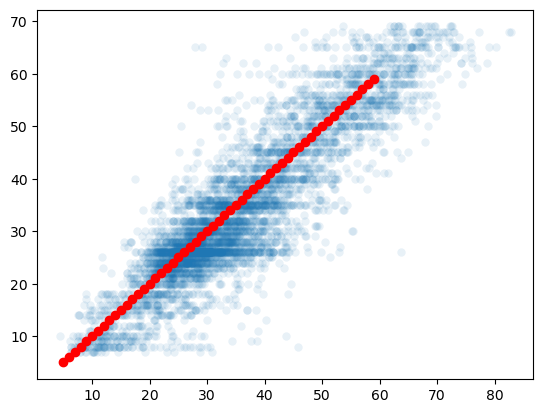

INFO:tensorflow:Assets written to: 4_model.pkl/assets


INFO:tensorflow:Assets written to: 4_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 522ms/step - loss: 78.6879 - val_loss: 99.8175
Epoch 2/4
62/62 [==============================] - 33s 542ms/step - loss: 61.0515 - val_loss: 96.4855
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 51.9516 - val_loss: 99.9635
Epoch 4/4
62/62 [==============================] - 33s 531ms/step - loss: 49.0353 - val_loss: 97.7046
Epoch 1/4
62/62 [==============================] - 34s 544ms/step - loss: 64.1867 - val_loss: 101.0835
Epoch 2/4
62/62 [==============================] - 33s 529ms/step - loss: 54.9495 - val_loss: 97.6392
Epoch 3/4
62/62 [==============================] - 33s 527ms/step - loss: 49.2640 - val_loss: 108.7834
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


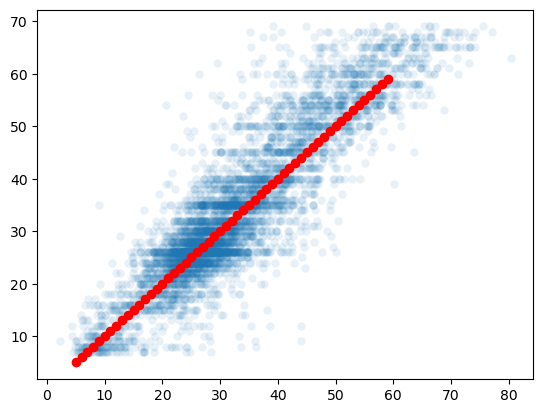

INFO:tensorflow:Assets written to: 4_model.pkl/assets


INFO:tensorflow:Assets written to: 4_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 74.7960 - val_loss: 87.4292
Epoch 2/4
62/62 [==============================] - 32s 516ms/step - loss: 58.1629 - val_loss: 93.1428
Epoch 3/4
62/62 [==============================] - 32s 521ms/step - loss: 50.9052 - val_loss: 86.9942
Epoch 4/4
62/62 [==============================] - 32s 521ms/step - loss: 41.3322 - val_loss: 87.5921
Epoch 1/4
62/62 [==============================] - 32s 526ms/step - loss: 60.4304 - val_loss: 86.5151
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 49.1280 - val_loss: 90.7120
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 44.8900 - val_loss: 88.8065
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


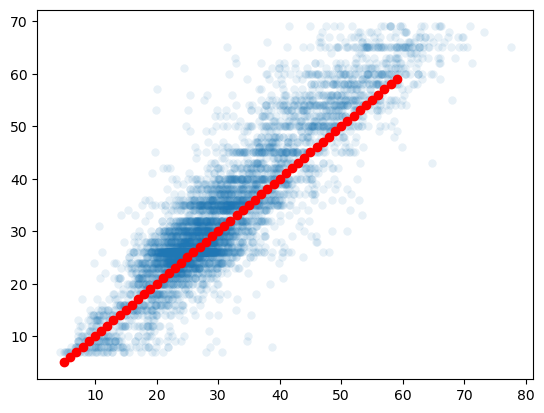

INFO:tensorflow:Assets written to: 4_model.pkl/assets


INFO:tensorflow:Assets written to: 4_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 511ms/step - loss: 70.1098 - val_loss: 94.8634
Epoch 2/4
63/63 [==============================] - 32s 515ms/step - loss: 61.8899 - val_loss: 128.2156
Epoch 3/4
63/63 [==============================] - 32s 514ms/step - loss: 74.0190 - val_loss: 87.2177
Epoch 4/4
63/63 [==============================] - 32s 510ms/step - loss: 50.4366 - val_loss: 85.3643
Epoch 1/4
63/63 [==============================] - 33s 520ms/step - loss: 63.7317 - val_loss: 90.6203
Epoch 2/4
63/63 [==============================] - 32s 514ms/step - loss: 58.4340 - val_loss: 104.8048
Epoch 3/4
63/63 [==============================] - 32s 510ms/step - loss: 65.1906 - val_loss: 84.3867
Epoch 4/4
156/156 [==============================] - 28s 177ms/step


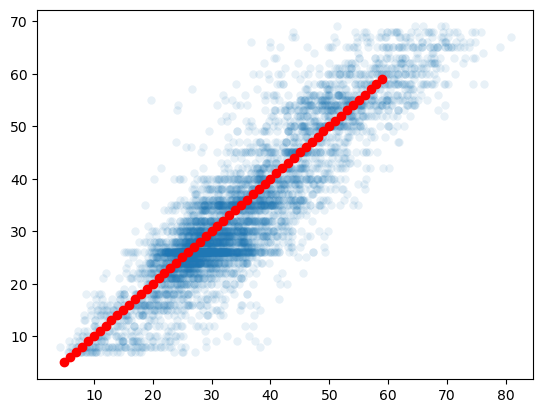

INFO:tensorflow:Assets written to: 4_model.pkl/assets


INFO:tensorflow:Assets written to: 4_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 78.8433 - val_loss: 98.1363
Epoch 2/4
62/62 [==============================] - 32s 520ms/step - loss: 59.7964 - val_loss: 104.2091
Epoch 3/4
62/62 [==============================] - 32s 518ms/step - loss: 50.9933 - val_loss: 99.7168
Epoch 4/4
62/62 [==============================] - 32s 525ms/step - loss: 45.8650 - val_loss: 103.5528
Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 64.4025 - val_loss: 105.3565
Epoch 2/4
62/62 [==============================] - 33s 526ms/step - loss: 52.6811 - val_loss: 98.4880
Epoch 3/4
62/62 [==============================] - 33s 526ms/step - loss: 46.8768 - val_loss: 100.5014
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


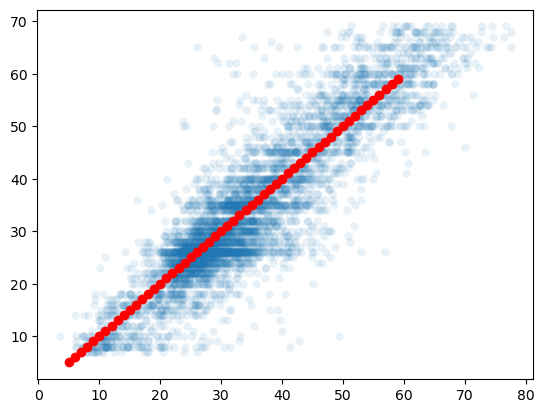

INFO:tensorflow:Assets written to: 5_model.pkl/assets


INFO:tensorflow:Assets written to: 5_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 69.4006 - val_loss: 98.4373
Epoch 2/4
62/62 [==============================] - 32s 524ms/step - loss: 56.2443 - val_loss: 95.9092
Epoch 3/4
62/62 [==============================] - 32s 521ms/step - loss: 45.5029 - val_loss: 97.9676
Epoch 4/4
62/62 [==============================] - 32s 517ms/step - loss: 43.4382 - val_loss: 98.1350
Epoch 1/4
62/62 [==============================] - 32s 522ms/step - loss: 60.3450 - val_loss: 100.7246
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 50.1749 - val_loss: 103.4480
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 42.1682 - val_loss: 103.9288
Epoch 4/4
155/155 [==============================] - 27s 174ms/step


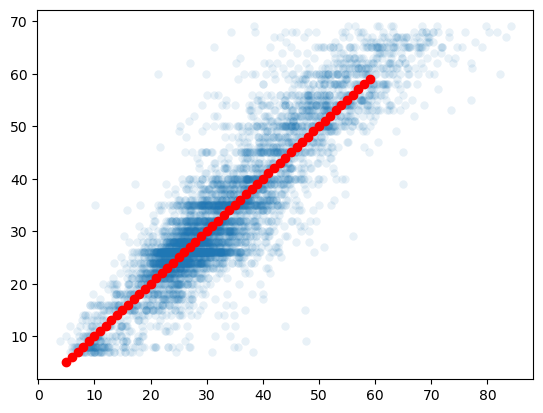

INFO:tensorflow:Assets written to: 5_model.pkl/assets


INFO:tensorflow:Assets written to: 5_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 65.4690 - val_loss: 90.0699
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 51.9680 - val_loss: 90.9282
Epoch 3/4
62/62 [==============================] - 32s 522ms/step - loss: 43.2375 - val_loss: 86.4528
Epoch 4/4
62/62 [==============================] - 33s 528ms/step - loss: 40.3698 - val_loss: 86.2788
Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 55.4001 - val_loss: 90.2396
Epoch 2/4
62/62 [==============================] - 32s 522ms/step - loss: 48.1246 - val_loss: 93.1769
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 42.3970 - val_loss: 87.5835
Epoch 4/4
155/155 [==============================] - 27s 175ms/step


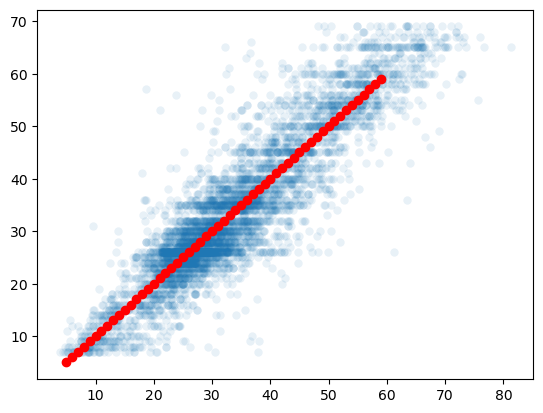

INFO:tensorflow:Assets written to: 5_model.pkl/assets


INFO:tensorflow:Assets written to: 5_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 33s 519ms/step - loss: 68.3205 - val_loss: 102.4939
Epoch 2/4
63/63 [==============================] - 32s 514ms/step - loss: 64.6339 - val_loss: 86.6406
Epoch 3/4
63/63 [==============================] - 32s 508ms/step - loss: 49.5452 - val_loss: 88.6199
Epoch 4/4
63/63 [==============================] - 33s 518ms/step - loss: 47.9608 - val_loss: 95.4584
Epoch 1/4
63/63 [==============================] - 32s 516ms/step - loss: 62.9604 - val_loss: 94.3754
Epoch 2/4
63/63 [==============================] - 32s 509ms/step - loss: 49.4275 - val_loss: 109.9668
Epoch 3/4
63/63 [==============================] - 32s 517ms/step - loss: 61.5330 - val_loss: 109.5209
Epoch 4/4
156/156 [==============================] - 27s 175ms/step


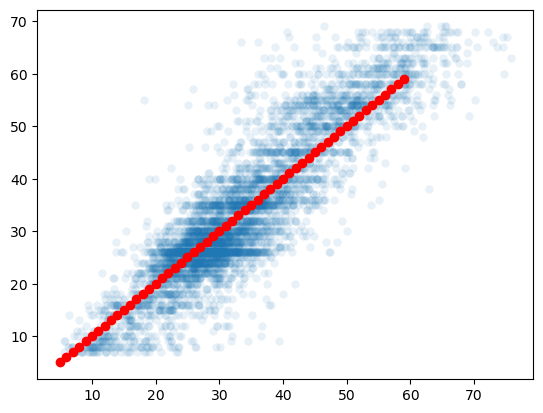

INFO:tensorflow:Assets written to: 5_model.pkl/assets


INFO:tensorflow:Assets written to: 5_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 522ms/step - loss: 72.1867 - val_loss: 99.0227
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 53.3403 - val_loss: 95.6540
Epoch 3/4
62/62 [==============================] - 32s 522ms/step - loss: 45.2275 - val_loss: 99.1650
Epoch 4/4
62/62 [==============================] - 32s 520ms/step - loss: 42.2230 - val_loss: 101.9421
Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 61.1757 - val_loss: 96.5024
Epoch 2/4
62/62 [==============================] - 32s 515ms/step - loss: 48.2071 - val_loss: 110.0755
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 43.8560 - val_loss: 98.0482
Epoch 4/4
155/155 [==============================] - 27s 176ms/step


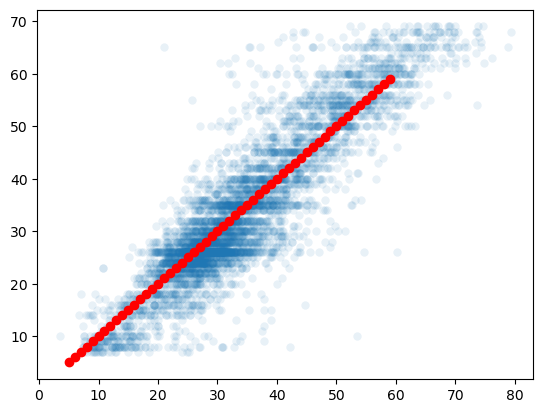

INFO:tensorflow:Assets written to: 6_model.pkl/assets


INFO:tensorflow:Assets written to: 6_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 66.7897 - val_loss: 98.5629
Epoch 2/4
62/62 [==============================] - 32s 524ms/step - loss: 50.8999 - val_loss: 97.1093
Epoch 3/4
62/62 [==============================] - 32s 519ms/step - loss: 45.1268 - val_loss: 97.9125
Epoch 4/4
62/62 [==============================] - 32s 516ms/step - loss: 42.5756 - val_loss: 98.7161
Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 54.1250 - val_loss: 101.6861
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 45.6973 - val_loss: 100.1365
Epoch 3/4
62/62 [==============================] - 32s 513ms/step - loss: 42.4736 - val_loss: 101.9259
Epoch 4/4
155/155 [==============================] - 27s 176ms/step


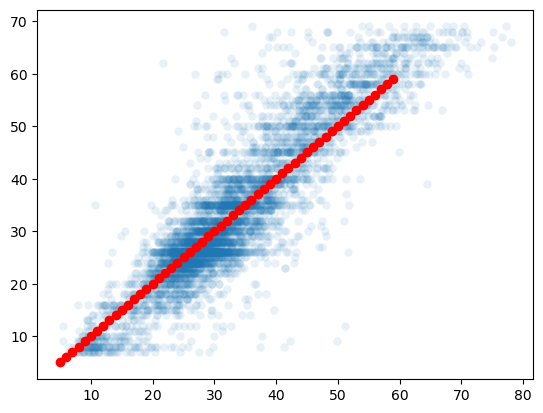

INFO:tensorflow:Assets written to: 6_model.pkl/assets


INFO:tensorflow:Assets written to: 6_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 63.9225 - val_loss: 90.0791
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 48.6580 - val_loss: 90.2676
Epoch 3/4
62/62 [==============================] - 32s 515ms/step - loss: 39.9740 - val_loss: 91.4345
Epoch 4/4
62/62 [==============================] - 32s 522ms/step - loss: 38.7873 - val_loss: 90.8363
Epoch 1/4
62/62 [==============================] - 32s 514ms/step - loss: 51.1187 - val_loss: 93.5880
Epoch 2/4
62/62 [==============================] - 32s 516ms/step - loss: 47.5354 - val_loss: 90.7960
Epoch 3/4
62/62 [==============================] - 32s 519ms/step - loss: 41.1627 - val_loss: 91.7611
Epoch 4/4
155/155 [==============================] - 27s 177ms/step


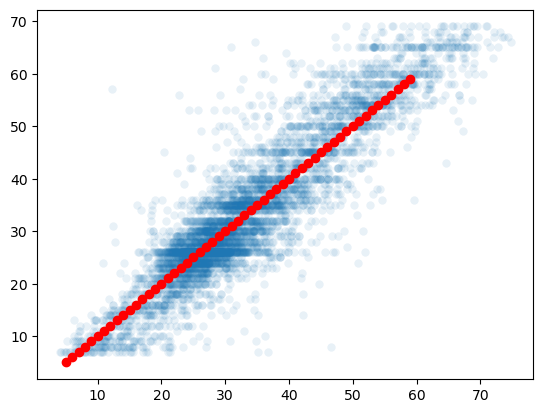

INFO:tensorflow:Assets written to: 6_model.pkl/assets


INFO:tensorflow:Assets written to: 6_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 513ms/step - loss: 58.8360 - val_loss: 128.3421
Epoch 2/4
63/63 [==============================] - 32s 516ms/step - loss: 71.6909 - val_loss: 90.2256
Epoch 3/4
63/63 [==============================] - 32s 515ms/step - loss: 50.0111 - val_loss: 108.2758
Epoch 4/4
63/63 [==============================] - 32s 511ms/step - loss: 49.8442 - val_loss: 84.2362
Epoch 1/4
63/63 [==============================] - 32s 514ms/step - loss: 56.9046 - val_loss: 91.7279
Epoch 2/4
63/63 [==============================] - 32s 506ms/step - loss: 50.6311 - val_loss: 94.4794
Epoch 3/4
63/63 [==============================] - 32s 509ms/step - loss: 44.2233 - val_loss: 86.8983
Epoch 4/4
156/156 [==============================] - 29s 186ms/step


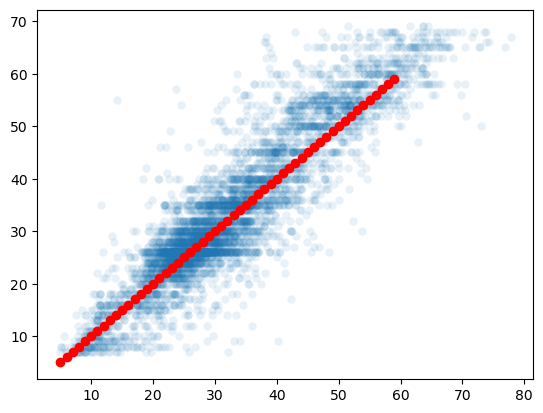

INFO:tensorflow:Assets written to: 6_model.pkl/assets


INFO:tensorflow:Assets written to: 6_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 67.8930 - val_loss: 97.6902
Epoch 2/4
62/62 [==============================] - 32s 522ms/step - loss: 52.7354 - val_loss: 99.4616
Epoch 3/4
62/62 [==============================] - 32s 522ms/step - loss: 42.4482 - val_loss: 95.6818
Epoch 4/4
62/62 [==============================] - 32s 518ms/step - loss: 40.5678 - val_loss: 97.6548
Epoch 1/4
62/62 [==============================] - 33s 530ms/step - loss: 55.1762 - val_loss: 100.6277
Epoch 2/4
62/62 [==============================] - 33s 534ms/step - loss: 45.1009 - val_loss: 99.9688
Epoch 3/4
62/62 [==============================] - 32s 517ms/step - loss: 40.9341 - val_loss: 98.6352
Epoch 4/4
155/155 [==============================] - 27s 176ms/step


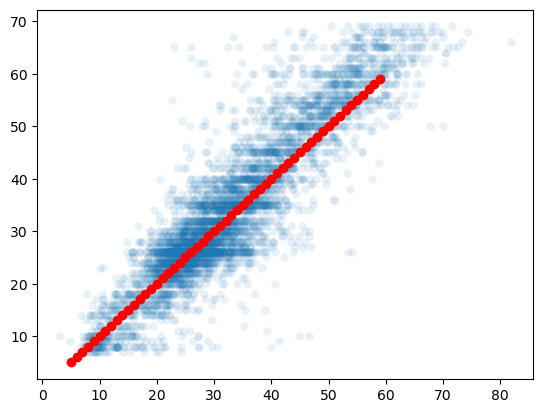

INFO:tensorflow:Assets written to: 7_model.pkl/assets


INFO:tensorflow:Assets written to: 7_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 63.1174 - val_loss: 102.5000
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 48.9725 - val_loss: 105.0379
Epoch 3/4
62/62 [==============================] - 32s 524ms/step - loss: 42.9903 - val_loss: 104.6721
Epoch 4/4
62/62 [==============================] - 33s 527ms/step - loss: 39.7139 - val_loss: 103.3228
Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 54.6987 - val_loss: 103.7747
Epoch 2/4
62/62 [==============================] - 32s 519ms/step - loss: 43.8456 - val_loss: 102.9343
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 40.7031 - val_loss: 102.3601
Epoch 4/4
155/155 [==============================] - 28s 179ms/step


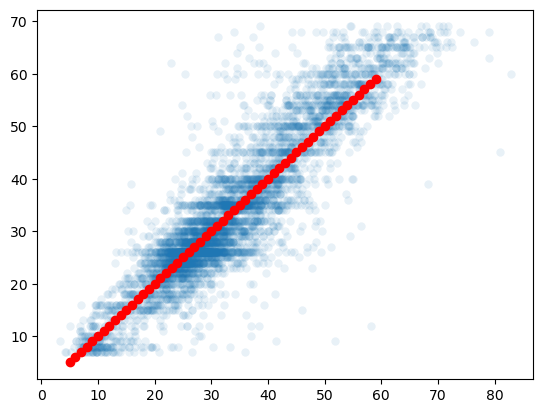

INFO:tensorflow:Assets written to: 7_model.pkl/assets


INFO:tensorflow:Assets written to: 7_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 59.5194 - val_loss: 94.4181
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 45.3983 - val_loss: 87.9821
Epoch 3/4
62/62 [==============================] - 33s 529ms/step - loss: 40.7153 - val_loss: 92.3707
Epoch 4/4
62/62 [==============================] - 33s 530ms/step - loss: 36.9988 - val_loss: 88.2578
Epoch 1/4
62/62 [==============================] - 33s 536ms/step - loss: 50.0783 - val_loss: 93.1890
Epoch 2/4
62/62 [==============================] - 32s 515ms/step - loss: 41.5988 - val_loss: 90.2785
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 34.8202 - val_loss: 89.3990
Epoch 4/4
155/155 [==============================] - 28s 181ms/step


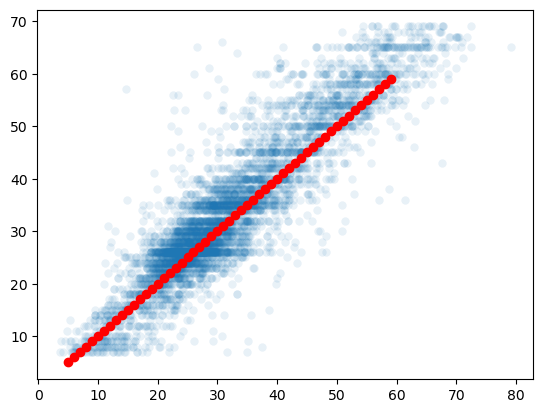

INFO:tensorflow:Assets written to: 7_model.pkl/assets


INFO:tensorflow:Assets written to: 7_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 514ms/step - loss: 57.9217 - val_loss: 93.0039
Epoch 2/4
63/63 [==============================] - 32s 512ms/step - loss: 50.0010 - val_loss: 87.4657
Epoch 3/4
63/63 [==============================] - 32s 514ms/step - loss: 44.0138 - val_loss: 82.4583
Epoch 4/4
63/63 [==============================] - 32s 507ms/step - loss: 39.3926 - val_loss: 82.7105
Epoch 1/4
63/63 [==============================] - 32s 508ms/step - loss: 49.6382 - val_loss: 92.2637
Epoch 2/4
63/63 [==============================] - 32s 510ms/step - loss: 42.4627 - val_loss: 92.5948
Epoch 3/4
63/63 [==============================] - 32s 510ms/step - loss: 42.6439 - val_loss: 90.6241
Epoch 4/4
156/156 [==============================] - 28s 177ms/step


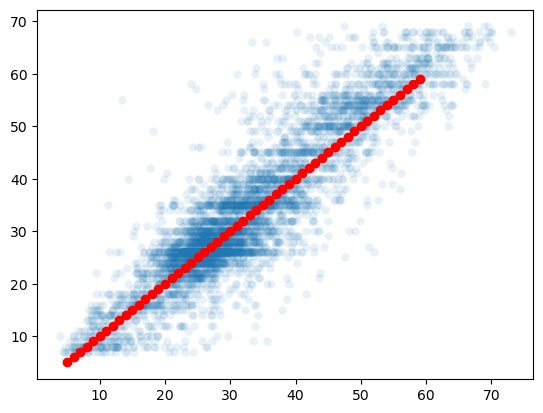

INFO:tensorflow:Assets written to: 7_model.pkl/assets


INFO:tensorflow:Assets written to: 7_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 62.4283 - val_loss: 94.8108
Epoch 2/4
62/62 [==============================] - 32s 513ms/step - loss: 48.4681 - val_loss: 96.5818
Epoch 3/4
62/62 [==============================] - 32s 524ms/step - loss: 41.4544 - val_loss: 96.1158
Epoch 4/4
62/62 [==============================] - 32s 525ms/step - loss: 35.9030 - val_loss: 96.6367
Epoch 1/4
62/62 [==============================] - 33s 528ms/step - loss: 52.8675 - val_loss: 99.7074
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 43.1572 - val_loss: 97.1665
Epoch 3/4
62/62 [==============================] - 32s 519ms/step - loss: 39.9609 - val_loss: 95.5283
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


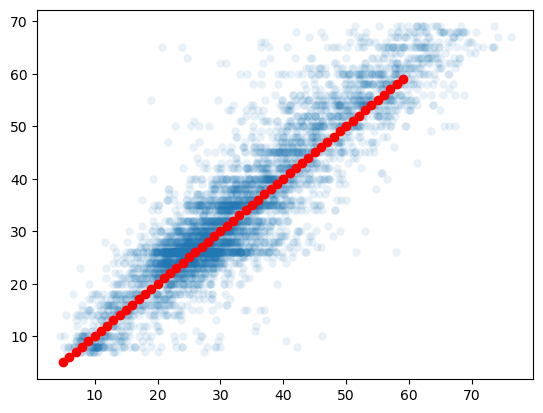

INFO:tensorflow:Assets written to: 8_model.pkl/assets


INFO:tensorflow:Assets written to: 8_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 529ms/step - loss: 56.8633 - val_loss: 98.8468
Epoch 2/4
62/62 [==============================] - 33s 529ms/step - loss: 44.7830 - val_loss: 101.8887
Epoch 3/4
62/62 [==============================] - 33s 527ms/step - loss: 38.0660 - val_loss: 99.9861
Epoch 4/4
62/62 [==============================] - 32s 524ms/step - loss: 35.3775 - val_loss: 103.1745
Epoch 1/4
62/62 [==============================] - 33s 530ms/step - loss: 51.1951 - val_loss: 105.6032
Epoch 2/4
62/62 [==============================] - 32s 519ms/step - loss: 42.5644 - val_loss: 105.8617
Epoch 3/4
62/62 [==============================] - 32s 515ms/step - loss: 37.8447 - val_loss: 102.5674
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


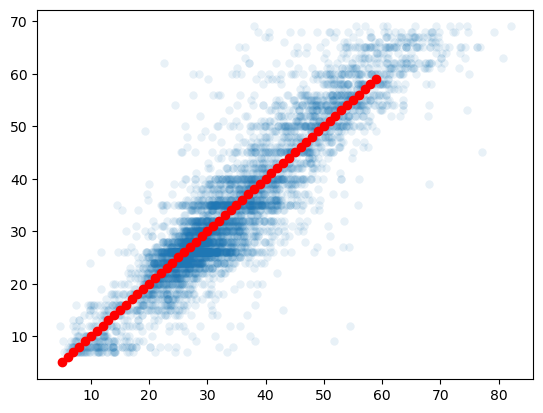

INFO:tensorflow:Assets written to: 8_model.pkl/assets


INFO:tensorflow:Assets written to: 8_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 516ms/step - loss: 55.0697 - val_loss: 87.0509
Epoch 2/4
62/62 [==============================] - 32s 516ms/step - loss: 43.1671 - val_loss: 87.4250
Epoch 3/4
62/62 [==============================] - 32s 525ms/step - loss: 36.9481 - val_loss: 88.9570
Epoch 4/4
62/62 [==============================] - 32s 512ms/step - loss: 35.6679 - val_loss: 84.9802
Epoch 1/4
62/62 [==============================] - 32s 518ms/step - loss: 49.2920 - val_loss: 91.9699
Epoch 2/4
62/62 [==============================] - 32s 519ms/step - loss: 40.0737 - val_loss: 89.7079
Epoch 3/4
62/62 [==============================] - 32s 517ms/step - loss: 35.7397 - val_loss: 91.6491
Epoch 4/4
155/155 [==============================] - 28s 182ms/step


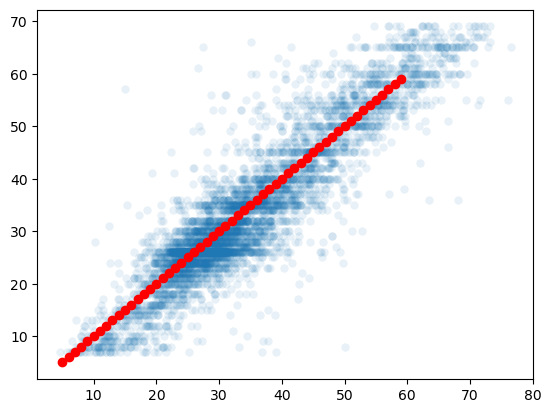

INFO:tensorflow:Assets written to: 8_model.pkl/assets


INFO:tensorflow:Assets written to: 8_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 507ms/step - loss: 53.9147 - val_loss: 84.7482
Epoch 2/4
63/63 [==============================] - 32s 506ms/step - loss: 43.9308 - val_loss: 87.3293
Epoch 3/4
63/63 [==============================] - 32s 507ms/step - loss: 40.6900 - val_loss: 97.9685
Epoch 4/4
63/63 [==============================] - 32s 515ms/step - loss: 39.5776 - val_loss: 99.6895
Epoch 1/4
63/63 [==============================] - 32s 516ms/step - loss: 55.4672 - val_loss: 94.6089
Epoch 2/4
63/63 [==============================] - 32s 508ms/step - loss: 44.4531 - val_loss: 90.1979
Epoch 3/4
63/63 [==============================] - 32s 514ms/step - loss: 43.3197 - val_loss: 89.7162
Epoch 4/4
156/156 [==============================] - 28s 176ms/step


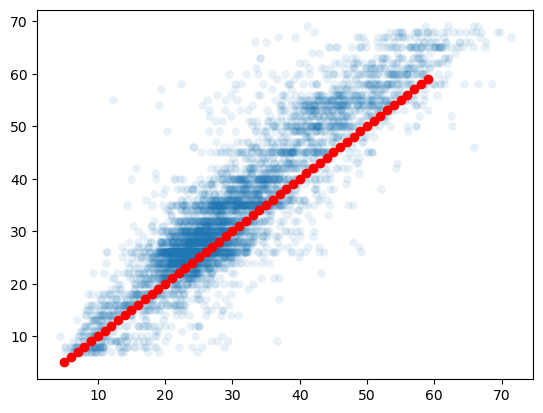

INFO:tensorflow:Assets written to: 8_model.pkl/assets


INFO:tensorflow:Assets written to: 8_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 61.6091 - val_loss: 99.0831
Epoch 2/4
62/62 [==============================] - 32s 520ms/step - loss: 45.5286 - val_loss: 101.4057
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 39.8621 - val_loss: 106.0895
Epoch 4/4
62/62 [==============================] - 32s 525ms/step - loss: 38.0412 - val_loss: 105.0356
Epoch 1/4
62/62 [==============================] - 33s 529ms/step - loss: 50.1998 - val_loss: 98.5866
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 41.3645 - val_loss: 95.9534
Epoch 3/4
62/62 [==============================] - 32s 521ms/step - loss: 37.0499 - val_loss: 97.7485
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


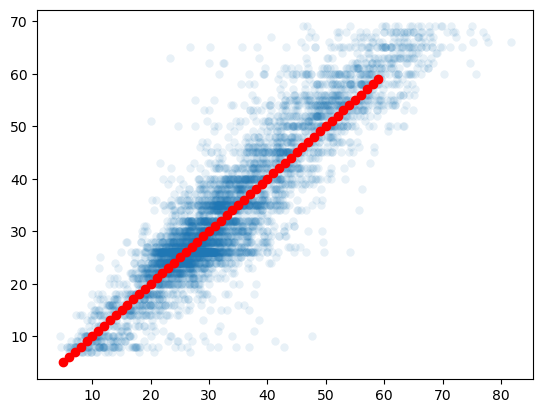

INFO:tensorflow:Assets written to: 9_model.pkl/assets


INFO:tensorflow:Assets written to: 9_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 519ms/step - loss: 54.0759 - val_loss: 100.6073
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 41.6305 - val_loss: 112.2838
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 38.4452 - val_loss: 106.8713
Epoch 4/4
62/62 [==============================] - 32s 517ms/step - loss: 35.8124 - val_loss: 100.8563
Epoch 1/4
62/62 [==============================] - 32s 517ms/step - loss: 46.4596 - val_loss: 100.3054
Epoch 2/4
62/62 [==============================] - 32s 515ms/step - loss: 43.4050 - val_loss: 104.1362
Epoch 3/4
62/62 [==============================] - 32s 509ms/step - loss: 37.2554 - val_loss: 102.2007
Epoch 4/4
155/155 [==============================] - 28s 179ms/step


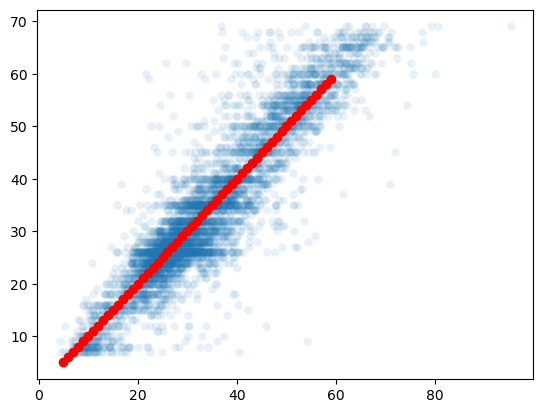

INFO:tensorflow:Assets written to: 9_model.pkl/assets


INFO:tensorflow:Assets written to: 9_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 522ms/step - loss: 52.4179 - val_loss: 87.6706
Epoch 2/4
62/62 [==============================] - 32s 515ms/step - loss: 44.0302 - val_loss: 83.0894
Epoch 3/4
62/62 [==============================] - 32s 524ms/step - loss: 36.8128 - val_loss: 87.5095
Epoch 4/4
62/62 [==============================] - 33s 526ms/step - loss: 34.0716 - val_loss: 88.3990
Epoch 1/4
62/62 [==============================] - 32s 519ms/step - loss: 45.5415 - val_loss: 94.6659
Epoch 2/4
62/62 [==============================] - 32s 513ms/step - loss: 37.8513 - val_loss: 93.3940
Epoch 3/4
62/62 [==============================] - 32s 518ms/step - loss: 37.6310 - val_loss: 90.4021
Epoch 4/4
155/155 [==============================] - 27s 177ms/step


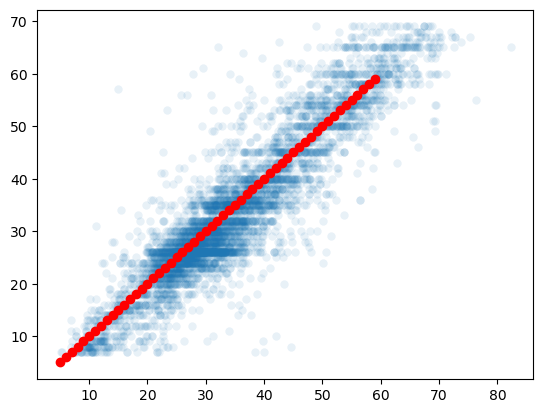

INFO:tensorflow:Assets written to: 9_model.pkl/assets


INFO:tensorflow:Assets written to: 9_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 33s 518ms/step - loss: 49.8280 - val_loss: 84.5124
Epoch 2/4
63/63 [==============================] - 31s 500ms/step - loss: 40.4960 - val_loss: 84.8860
Epoch 3/4
63/63 [==============================] - 32s 505ms/step - loss: 35.7811 - val_loss: 82.5131
Epoch 4/4
63/63 [==============================] - 32s 512ms/step - loss: 34.0373 - val_loss: 81.9034
Epoch 1/4
63/63 [==============================] - 32s 515ms/step - loss: 46.3157 - val_loss: 93.9174
Epoch 2/4
63/63 [==============================] - 32s 503ms/step - loss: 41.0720 - val_loss: 92.2744
Epoch 3/4
63/63 [==============================] - 32s 514ms/step - loss: 38.0948 - val_loss: 105.5304
Epoch 4/4
156/156 [==============================] - 28s 180ms/step


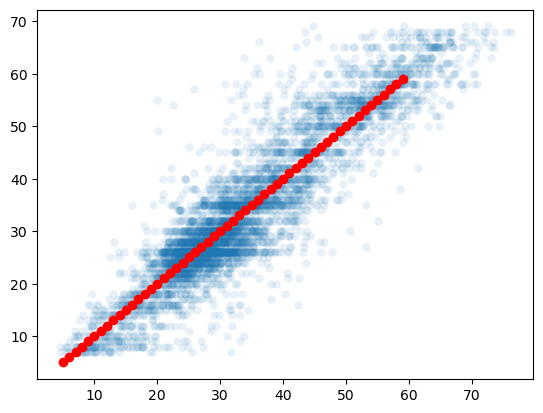

INFO:tensorflow:Assets written to: 9_model.pkl/assets


INFO:tensorflow:Assets written to: 9_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 515ms/step - loss: 56.7236 - val_loss: 99.3290
Epoch 2/4
62/62 [==============================] - 32s 515ms/step - loss: 42.9241 - val_loss: 106.2745
Epoch 3/4
62/62 [==============================] - 32s 518ms/step - loss: 40.1888 - val_loss: 105.2327
Epoch 4/4
62/62 [==============================] - 32s 517ms/step - loss: 36.0260 - val_loss: 102.2593
Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 46.7179 - val_loss: 97.4923
Epoch 2/4
62/62 [==============================] - 32s 521ms/step - loss: 39.6562 - val_loss: 103.6964
Epoch 3/4
62/62 [==============================] - 32s 514ms/step - loss: 36.2310 - val_loss: 95.9878
Epoch 4/4
155/155 [==============================] - 27s 177ms/step


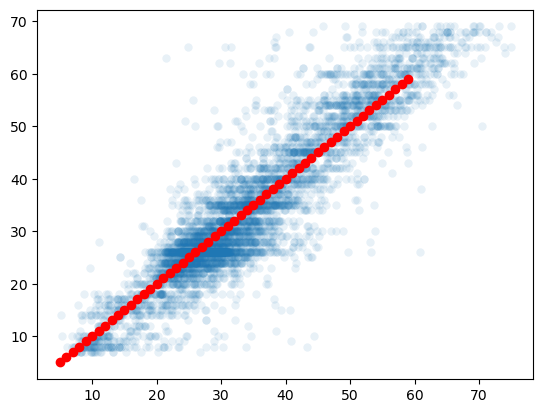

INFO:tensorflow:Assets written to: 10_model.pkl/assets


INFO:tensorflow:Assets written to: 10_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 50.7158 - val_loss: 101.6217
Epoch 2/4
62/62 [==============================] - 33s 527ms/step - loss: 41.6678 - val_loss: 99.8641
Epoch 3/4
62/62 [==============================] - 32s 522ms/step - loss: 34.7267 - val_loss: 99.8829
Epoch 4/4
62/62 [==============================] - 33s 528ms/step - loss: 33.7319 - val_loss: 105.2291
Epoch 1/4
62/62 [==============================] - 32s 526ms/step - loss: 45.8332 - val_loss: 104.8513
Epoch 2/4
62/62 [==============================] - 32s 511ms/step - loss: 39.1110 - val_loss: 100.3816
Epoch 3/4
62/62 [==============================] - 32s 520ms/step - loss: 36.2250 - val_loss: 100.6562
Epoch 4/4
155/155 [==============================] - 28s 181ms/step


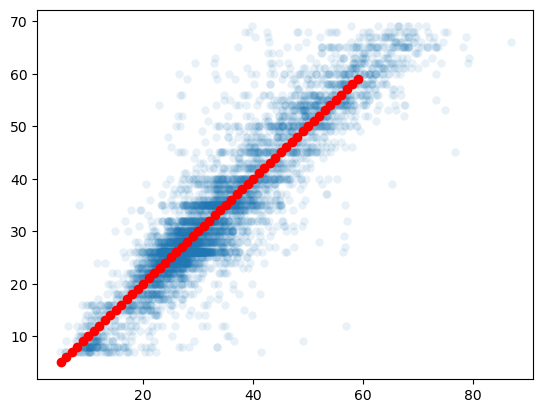

INFO:tensorflow:Assets written to: 10_model.pkl/assets


INFO:tensorflow:Assets written to: 10_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 526ms/step - loss: 50.3404 - val_loss: 87.8322
Epoch 2/4
62/62 [==============================] - 32s 520ms/step - loss: 38.7585 - val_loss: 83.4562
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 34.4508 - val_loss: 83.7969
Epoch 4/4
62/62 [==============================] - 33s 527ms/step - loss: 33.6971 - val_loss: 81.4044
Epoch 1/4
62/62 [==============================] - 33s 526ms/step - loss: 43.2329 - val_loss: 87.9354
Epoch 2/4
62/62 [==============================] - 32s 510ms/step - loss: 37.7780 - val_loss: 88.2660
Epoch 3/4
62/62 [==============================] - 32s 511ms/step - loss: 32.3415 - val_loss: 90.6367
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


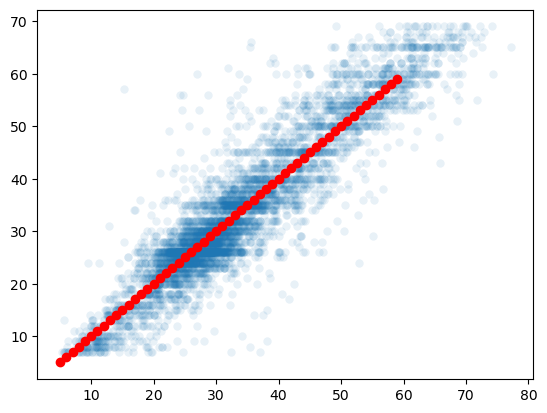

INFO:tensorflow:Assets written to: 10_model.pkl/assets


INFO:tensorflow:Assets written to: 10_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 514ms/step - loss: 48.5704 - val_loss: 90.2287
Epoch 2/4
63/63 [==============================] - 32s 512ms/step - loss: 40.8308 - val_loss: 83.9898
Epoch 3/4
63/63 [==============================] - 32s 514ms/step - loss: 34.2157 - val_loss: 84.5958
Epoch 4/4
63/63 [==============================] - 32s 514ms/step - loss: 36.6997 - val_loss: 87.0660
Epoch 1/4
63/63 [==============================] - 32s 507ms/step - loss: 43.9877 - val_loss: 91.0518
Epoch 2/4
63/63 [==============================] - 32s 508ms/step - loss: 40.0760 - val_loss: 93.4199
Epoch 3/4
63/63 [==============================] - 31s 501ms/step - loss: 47.7962 - val_loss: 96.7663
Epoch 4/4
156/156 [==============================] - 28s 180ms/step


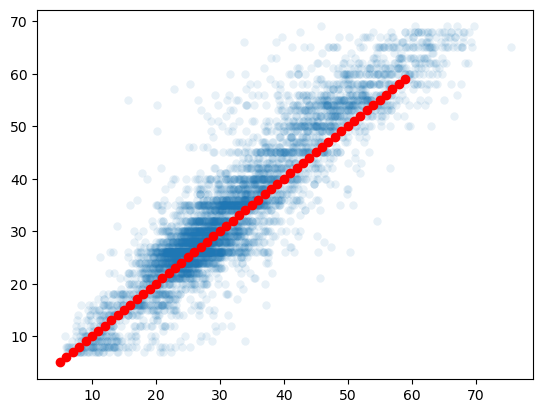

INFO:tensorflow:Assets written to: 10_model.pkl/assets


INFO:tensorflow:Assets written to: 10_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 526ms/step - loss: 53.5457 - val_loss: 97.1000
Epoch 2/4
62/62 [==============================] - 33s 530ms/step - loss: 39.8888 - val_loss: 101.7429
Epoch 3/4
62/62 [==============================] - 32s 524ms/step - loss: 36.6038 - val_loss: 100.8643
Epoch 4/4
62/62 [==============================] - 32s 523ms/step - loss: 33.7293 - val_loss: 106.2649
Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 43.7425 - val_loss: 96.7367
Epoch 2/4
62/62 [==============================] - 32s 519ms/step - loss: 38.7749 - val_loss: 98.2441
Epoch 3/4
62/62 [==============================] - 32s 522ms/step - loss: 34.7262 - val_loss: 98.6618
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


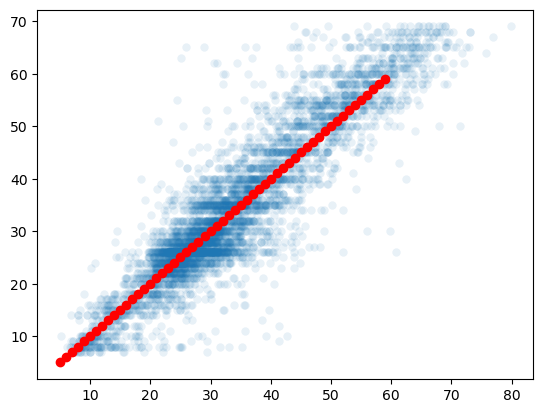

INFO:tensorflow:Assets written to: 11_model.pkl/assets


INFO:tensorflow:Assets written to: 11_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 33s 526ms/step - loss: 49.9483 - val_loss: 113.0432
Epoch 2/4
62/62 [==============================] - 32s 519ms/step - loss: 37.9815 - val_loss: 102.2580
Epoch 3/4
62/62 [==============================] - 32s 514ms/step - loss: 33.0648 - val_loss: 104.0763
Epoch 4/4
62/62 [==============================] - 32s 517ms/step - loss: 33.0606 - val_loss: 103.0643
Epoch 1/4
62/62 [==============================] - 32s 524ms/step - loss: 44.8995 - val_loss: 105.7058
Epoch 2/4
62/62 [==============================] - 32s 524ms/step - loss: 38.5480 - val_loss: 103.7577
Epoch 3/4
62/62 [==============================] - 32s 512ms/step - loss: 34.9570 - val_loss: 98.0754
Epoch 4/4
155/155 [==============================] - 28s 183ms/step


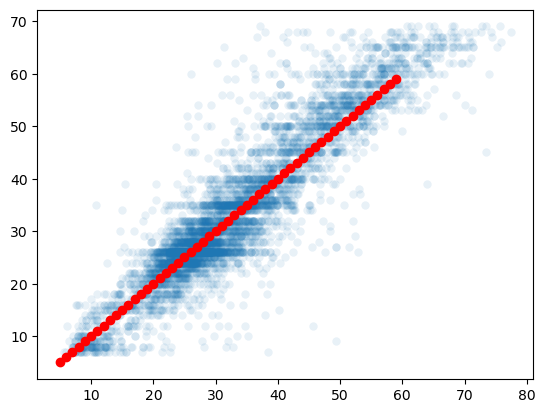

INFO:tensorflow:Assets written to: 11_model.pkl/assets


INFO:tensorflow:Assets written to: 11_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 31s 502ms/step - loss: 46.7685 - val_loss: 88.1236
Epoch 2/4
62/62 [==============================] - 31s 501ms/step - loss: 37.3365 - val_loss: 87.0604
Epoch 3/4
62/62 [==============================] - 31s 506ms/step - loss: 32.7837 - val_loss: 85.0436
Epoch 4/4
62/62 [==============================] - 31s 501ms/step - loss: 32.7852 - val_loss: 88.5887
Epoch 1/4
62/62 [==============================] - 31s 504ms/step - loss: 39.0757 - val_loss: 92.6428
Epoch 2/4
62/62 [==============================] - 31s 502ms/step - loss: 36.9071 - val_loss: 90.8212
Epoch 3/4
62/62 [==============================] - 31s 503ms/step - loss: 32.7696 - val_loss: 92.0759
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


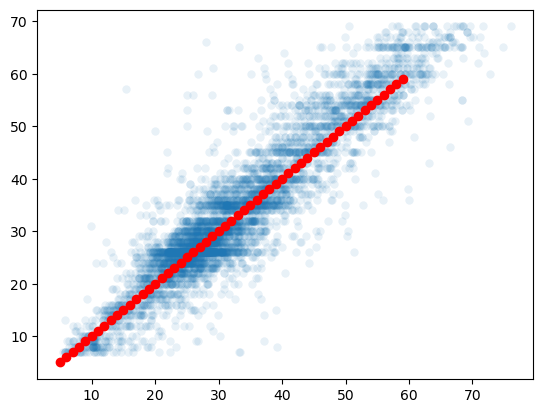

INFO:tensorflow:Assets written to: 11_model.pkl/assets


INFO:tensorflow:Assets written to: 11_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 501ms/step - loss: 44.1463 - val_loss: 86.7321
Epoch 2/4
63/63 [==============================] - 31s 499ms/step - loss: 37.6201 - val_loss: 85.6796
Epoch 3/4
63/63 [==============================] - 31s 501ms/step - loss: 32.6863 - val_loss: 85.4480
Epoch 4/4
63/63 [==============================] - 32s 505ms/step - loss: 31.3563 - val_loss: 89.1437
Epoch 1/4
63/63 [==============================] - 31s 500ms/step - loss: 42.6959 - val_loss: 90.4388
Epoch 2/4
63/63 [==============================] - 31s 493ms/step - loss: 35.5744 - val_loss: 92.1658
Epoch 3/4
63/63 [==============================] - 31s 500ms/step - loss: 32.4372 - val_loss: 96.0415
Epoch 4/4
156/156 [==============================] - 28s 179ms/step


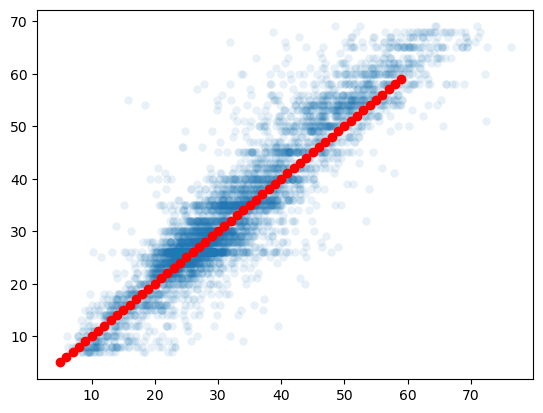

INFO:tensorflow:Assets written to: 11_model.pkl/assets


INFO:tensorflow:Assets written to: 11_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 514ms/step - loss: 47.6476 - val_loss: 96.2617
Epoch 2/4
62/62 [==============================] - 31s 505ms/step - loss: 38.8860 - val_loss: 98.9447
Epoch 3/4
62/62 [==============================] - 31s 506ms/step - loss: 32.5963 - val_loss: 97.7380
Epoch 4/4
62/62 [==============================] - 31s 508ms/step - loss: 32.3525 - val_loss: 93.6186
Epoch 1/4
62/62 [==============================] - 32s 514ms/step - loss: 40.9333 - val_loss: 101.0872
Epoch 2/4
62/62 [==============================] - 31s 502ms/step - loss: 36.6776 - val_loss: 96.9429
Epoch 3/4
62/62 [==============================] - 31s 504ms/step - loss: 33.5959 - val_loss: 97.8904
Epoch 4/4
155/155 [==============================] - 29s 188ms/step


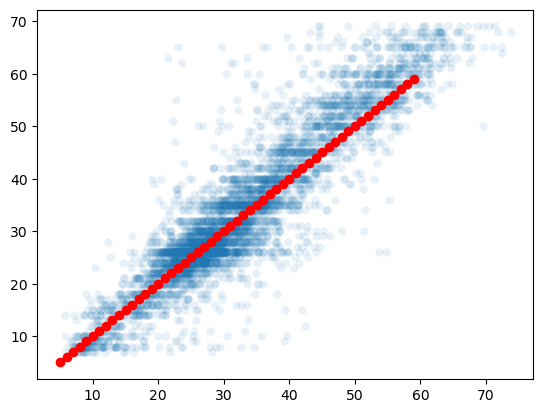

INFO:tensorflow:Assets written to: 12_model.pkl/assets


INFO:tensorflow:Assets written to: 12_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 31s 506ms/step - loss: 47.0442 - val_loss: 100.1173
Epoch 2/4
62/62 [==============================] - 31s 505ms/step - loss: 36.4250 - val_loss: 100.4561
Epoch 3/4
62/62 [==============================] - 31s 507ms/step - loss: 32.6469 - val_loss: 101.5752
Epoch 4/4
62/62 [==============================] - 31s 508ms/step - loss: 32.0640 - val_loss: 99.1260
Epoch 1/4
62/62 [==============================] - 32s 511ms/step - loss: 40.1065 - val_loss: 101.0520
Epoch 2/4
62/62 [==============================] - 31s 506ms/step - loss: 35.5323 - val_loss: 99.5073
Epoch 3/4
62/62 [==============================] - 31s 507ms/step - loss: 32.2425 - val_loss: 99.1640
Epoch 4/4
155/155 [==============================] - 28s 178ms/step


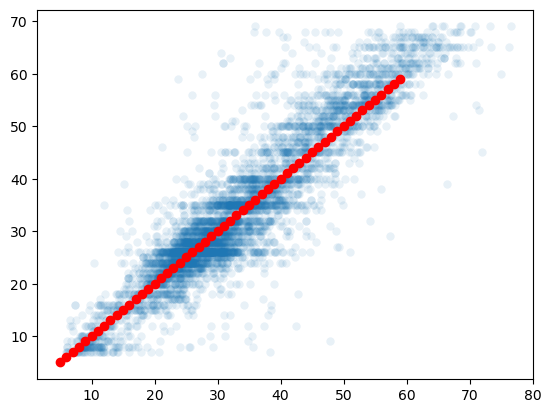

INFO:tensorflow:Assets written to: 12_model.pkl/assets


INFO:tensorflow:Assets written to: 12_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 512ms/step - loss: 44.5152 - val_loss: 90.9828
Epoch 2/4
62/62 [==============================] - 32s 517ms/step - loss: 36.4616 - val_loss: 87.1739
Epoch 3/4
62/62 [==============================] - 32s 513ms/step - loss: 31.9364 - val_loss: 89.5665
Epoch 4/4
62/62 [==============================] - 31s 509ms/step - loss: 31.6290 - val_loss: 92.0549
Epoch 1/4
62/62 [==============================] - 32s 520ms/step - loss: 37.5230 - val_loss: 89.4418
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 33.7246 - val_loss: 87.2420
Epoch 3/4
62/62 [==============================] - 31s 509ms/step - loss: 32.4838 - val_loss: 88.1890
Epoch 4/4
155/155 [==============================] - 28s 179ms/step


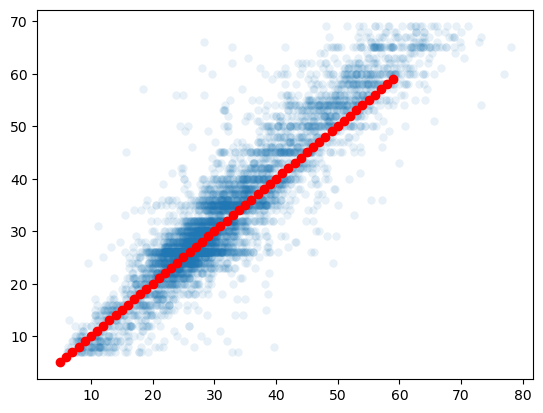

INFO:tensorflow:Assets written to: 12_model.pkl/assets


INFO:tensorflow:Assets written to: 12_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 33s 532ms/step - loss: 41.7165 - val_loss: 88.1001
Epoch 2/4
63/63 [==============================] - 32s 513ms/step - loss: 40.3154 - val_loss: 88.3654
Epoch 3/4
63/63 [==============================] - 32s 508ms/step - loss: 33.9275 - val_loss: 90.4093
Epoch 4/4
63/63 [==============================] - 32s 505ms/step - loss: 41.0127 - val_loss: 89.3694
Epoch 1/4
63/63 [==============================] - 32s 513ms/step - loss: 48.8983 - val_loss: 92.4231
Epoch 2/4
63/63 [==============================] - 32s 503ms/step - loss: 36.2277 - val_loss: 92.5751
Epoch 3/4
63/63 [==============================] - 32s 505ms/step - loss: 32.6349 - val_loss: 92.9216
Epoch 4/4
156/156 [==============================] - 28s 179ms/step


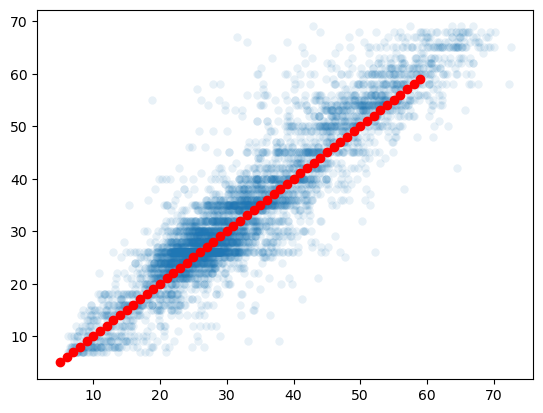

INFO:tensorflow:Assets written to: 12_model.pkl/assets


INFO:tensorflow:Assets written to: 12_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 512ms/step - loss: 48.9296 - val_loss: 95.3976
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 38.3512 - val_loss: 97.4417
Epoch 3/4
62/62 [==============================] - 32s 514ms/step - loss: 34.1606 - val_loss: 98.4356
Epoch 4/4
62/62 [==============================] - 32s 518ms/step - loss: 30.0977 - val_loss: 96.4086
Epoch 1/4
62/62 [==============================] - 32s 523ms/step - loss: 41.3444 - val_loss: 102.0300
Epoch 2/4
62/62 [==============================] - 32s 514ms/step - loss: 33.3857 - val_loss: 97.1811
Epoch 3/4
62/62 [==============================] - 32s 523ms/step - loss: 32.0683 - val_loss: 99.1089
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


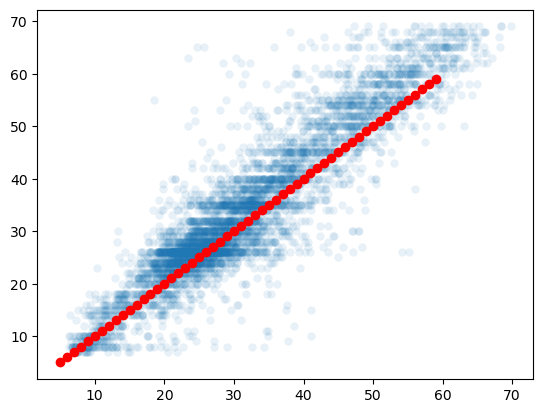

INFO:tensorflow:Assets written to: 13_model.pkl/assets


INFO:tensorflow:Assets written to: 13_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 510ms/step - loss: 45.4907 - val_loss: 101.1132
Epoch 2/4
62/62 [==============================] - 31s 504ms/step - loss: 36.4904 - val_loss: 100.3732
Epoch 3/4
62/62 [==============================] - 31s 506ms/step - loss: 32.7010 - val_loss: 101.1734
Epoch 4/4
62/62 [==============================] - 31s 507ms/step - loss: 29.1410 - val_loss: 101.7329
Epoch 1/4
62/62 [==============================] - 31s 508ms/step - loss: 41.4282 - val_loss: 100.6847
Epoch 2/4
62/62 [==============================] - 31s 507ms/step - loss: 35.3068 - val_loss: 99.7315
Epoch 3/4
62/62 [==============================] - 31s 505ms/step - loss: 29.7182 - val_loss: 100.1303
Epoch 4/4
155/155 [==============================] - 28s 179ms/step


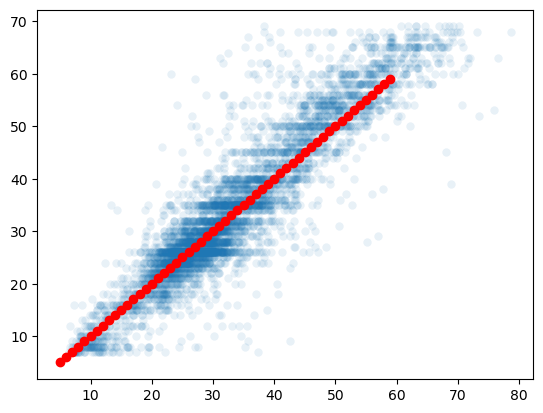

INFO:tensorflow:Assets written to: 13_model.pkl/assets


INFO:tensorflow:Assets written to: 13_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 31s 503ms/step - loss: 40.9569 - val_loss: 88.0372
Epoch 2/4
62/62 [==============================] - 31s 503ms/step - loss: 35.3301 - val_loss: 87.4966
Epoch 3/4
62/62 [==============================] - 32s 517ms/step - loss: 29.6790 - val_loss: 88.7044
Epoch 4/4
62/62 [==============================] - 32s 513ms/step - loss: 29.7407 - val_loss: 90.2375
Epoch 1/4
62/62 [==============================] - 32s 517ms/step - loss: 37.0500 - val_loss: 90.6471
Epoch 2/4
62/62 [==============================] - 31s 505ms/step - loss: 31.0975 - val_loss: 88.8138
Epoch 3/4
62/62 [==============================] - 31s 505ms/step - loss: 31.8865 - val_loss: 93.8511
Epoch 4/4
155/155 [==============================] - 28s 179ms/step


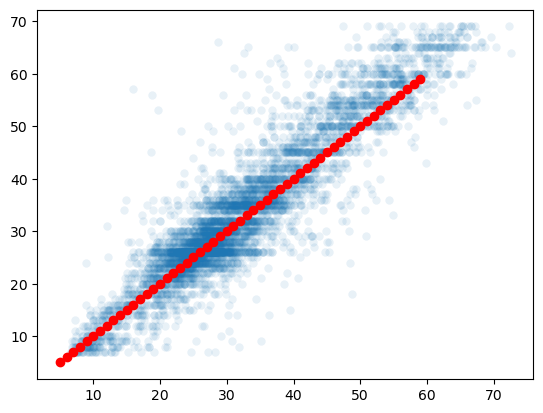

INFO:tensorflow:Assets written to: 13_model.pkl/assets


INFO:tensorflow:Assets written to: 13_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 31s 500ms/step - loss: 39.6537 - val_loss: 82.3392
Epoch 2/4
63/63 [==============================] - 31s 495ms/step - loss: 40.0396 - val_loss: 88.7212
Epoch 3/4
63/63 [==============================] - 31s 497ms/step - loss: 33.4067 - val_loss: 82.3619
Epoch 4/4
63/63 [==============================] - 31s 497ms/step - loss: 27.9509 - val_loss: 83.2137
Epoch 1/4
63/63 [==============================] - 31s 501ms/step - loss: 37.6131 - val_loss: 90.8612
Epoch 2/4
63/63 [==============================] - 31s 493ms/step - loss: 31.6221 - val_loss: 97.7044
Epoch 3/4
63/63 [==============================] - 31s 491ms/step - loss: 29.1204 - val_loss: 107.3806
Epoch 4/4
156/156 [==============================] - 29s 187ms/step


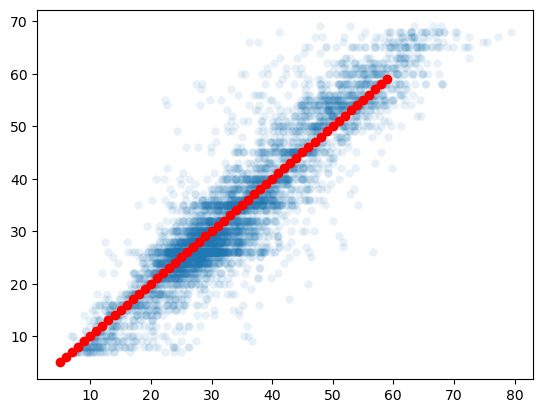

INFO:tensorflow:Assets written to: 13_model.pkl/assets


INFO:tensorflow:Assets written to: 13_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 510ms/step - loss: 44.7909 - val_loss: 95.6181
Epoch 2/4
62/62 [==============================] - 32s 513ms/step - loss: 35.0744 - val_loss: 98.3142
Epoch 3/4
62/62 [==============================] - 31s 510ms/step - loss: 32.4703 - val_loss: 97.1155
Epoch 4/4
62/62 [==============================] - 31s 507ms/step - loss: 29.0385 - val_loss: 99.2194
Epoch 1/4
62/62 [==============================] - 32s 510ms/step - loss: 41.9880 - val_loss: 102.1657
Epoch 2/4
62/62 [==============================] - 31s 506ms/step - loss: 36.2944 - val_loss: 97.2094
Epoch 3/4
62/62 [==============================] - 31s 507ms/step - loss: 30.6027 - val_loss: 99.2320
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


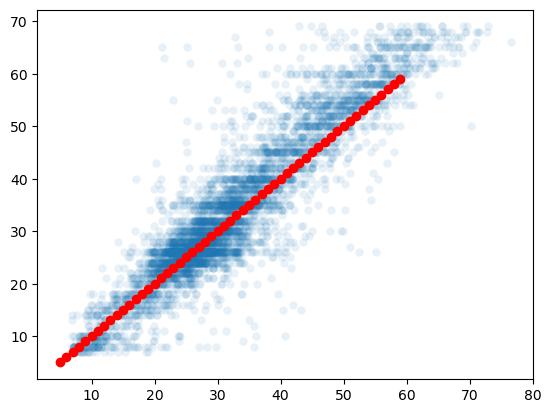

INFO:tensorflow:Assets written to: 14_model.pkl/assets


INFO:tensorflow:Assets written to: 14_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 31s 507ms/step - loss: 45.0073 - val_loss: 103.8650
Epoch 2/4
62/62 [==============================] - 31s 501ms/step - loss: 35.8804 - val_loss: 97.6886
Epoch 3/4
62/62 [==============================] - 32s 510ms/step - loss: 30.4790 - val_loss: 102.1729
Epoch 4/4
62/62 [==============================] - 32s 511ms/step - loss: 28.0980 - val_loss: 99.4693
Epoch 1/4
62/62 [==============================] - 31s 509ms/step - loss: 39.5661 - val_loss: 101.6768
Epoch 2/4
62/62 [==============================] - 31s 509ms/step - loss: 31.1729 - val_loss: 102.0262
Epoch 3/4
62/62 [==============================] - 32s 512ms/step - loss: 30.5628 - val_loss: 100.6341
Epoch 4/4
155/155 [==============================] - 27s 176ms/step


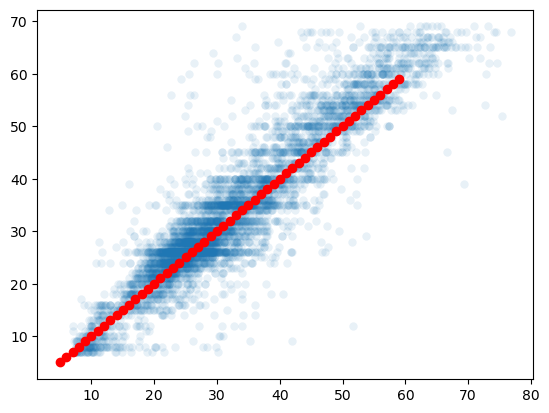

INFO:tensorflow:Assets written to: 14_model.pkl/assets


INFO:tensorflow:Assets written to: 14_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 511ms/step - loss: 42.9375 - val_loss: 88.7564
Epoch 2/4
62/62 [==============================] - 31s 502ms/step - loss: 32.8805 - val_loss: 88.3162
Epoch 3/4
62/62 [==============================] - 31s 501ms/step - loss: 29.5577 - val_loss: 86.6719
Epoch 4/4
62/62 [==============================] - 31s 505ms/step - loss: 29.7610 - val_loss: 84.9826
Epoch 1/4
62/62 [==============================] - 32s 517ms/step - loss: 36.4173 - val_loss: 89.2611
Epoch 2/4
62/62 [==============================] - 31s 504ms/step - loss: 30.5882 - val_loss: 90.1709
Epoch 3/4
62/62 [==============================] - 31s 504ms/step - loss: 29.0581 - val_loss: 87.9050
Epoch 4/4
155/155 [==============================] - 27s 176ms/step


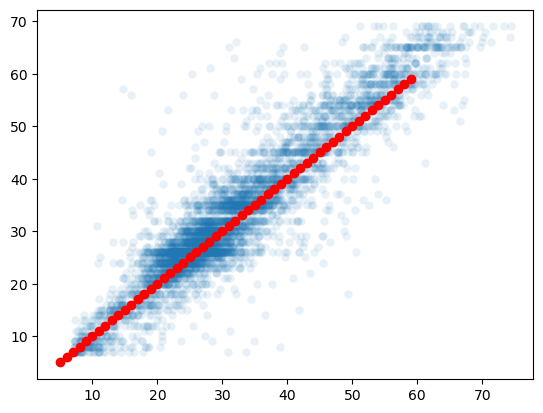

INFO:tensorflow:Assets written to: 14_model.pkl/assets


INFO:tensorflow:Assets written to: 14_model.pkl/assets


Epoch 1/4
63/63 [==============================] - 32s 505ms/step - loss: 39.6532 - val_loss: 83.7247
Epoch 2/4
63/63 [==============================] - 32s 505ms/step - loss: 32.7602 - val_loss: 86.6085
Epoch 3/4
63/63 [==============================] - 32s 506ms/step - loss: 31.0768 - val_loss: 82.7918
Epoch 4/4
63/63 [==============================] - 32s 501ms/step - loss: 27.1231 - val_loss: 85.9519
Epoch 1/4
63/63 [==============================] - 32s 509ms/step - loss: 36.3637 - val_loss: 102.9998
Epoch 2/4
63/63 [==============================] - 32s 502ms/step - loss: 34.8921 - val_loss: 89.6354
Epoch 3/4
63/63 [==============================] - 32s 505ms/step - loss: 29.1853 - val_loss: 89.1718
Epoch 4/4
156/156 [==============================] - 28s 179ms/step


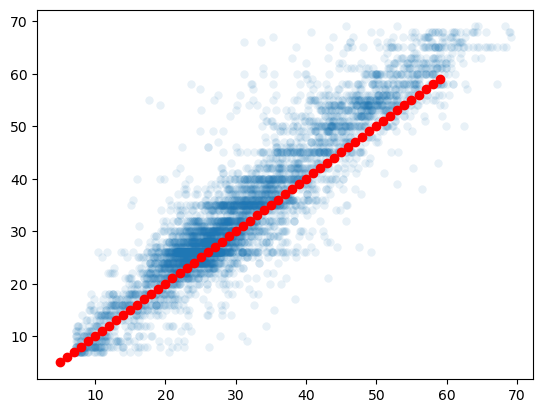

INFO:tensorflow:Assets written to: 14_model.pkl/assets


INFO:tensorflow:Assets written to: 14_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 512ms/step - loss: 45.3097 - val_loss: 106.9561
Epoch 2/4
62/62 [==============================] - 31s 506ms/step - loss: 36.5682 - val_loss: 94.2989
Epoch 3/4
62/62 [==============================] - 31s 507ms/step - loss: 30.9689 - val_loss: 99.0890
Epoch 4/4
62/62 [==============================] - 31s 509ms/step - loss: 28.2190 - val_loss: 95.7156
Epoch 1/4
62/62 [==============================] - 32s 510ms/step - loss: 37.0091 - val_loss: 101.5863
Epoch 2/4
62/62 [==============================] - 31s 503ms/step - loss: 31.8245 - val_loss: 105.4842
Epoch 3/4
62/62 [==============================] - 32s 510ms/step - loss: 31.8819 - val_loss: 102.4520
Epoch 4/4
155/155 [==============================] - 28s 179ms/step


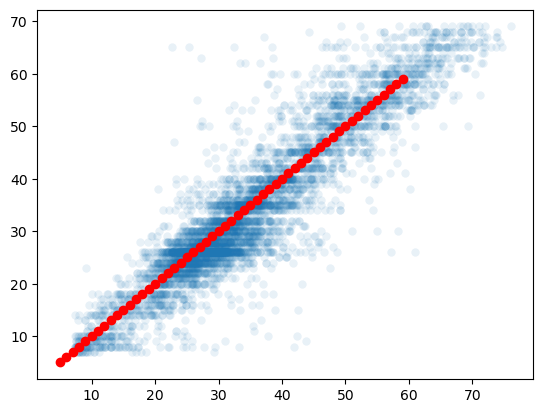

INFO:tensorflow:Assets written to: 15_model.pkl/assets


INFO:tensorflow:Assets written to: 15_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 32s 517ms/step - loss: 41.8154 - val_loss: 99.6378
Epoch 2/4
62/62 [==============================] - 36s 576ms/step - loss: 34.4363 - val_loss: 100.8755
Epoch 3/4
62/62 [==============================] - 32s 519ms/step - loss: 30.4145 - val_loss: 102.2138
Epoch 4/4
62/62 [==============================] - 32s 525ms/step - loss: 28.8280 - val_loss: 104.0135
Epoch 1/4
62/62 [==============================] - 33s 527ms/step - loss: 36.8446 - val_loss: 106.9506
Epoch 2/4
62/62 [==============================] - 31s 509ms/step - loss: 30.6157 - val_loss: 102.2759
Epoch 3/4
62/62 [==============================] - 32s 514ms/step - loss: 28.6101 - val_loss: 99.9330
Epoch 4/4
155/155 [==============================] - 28s 180ms/step


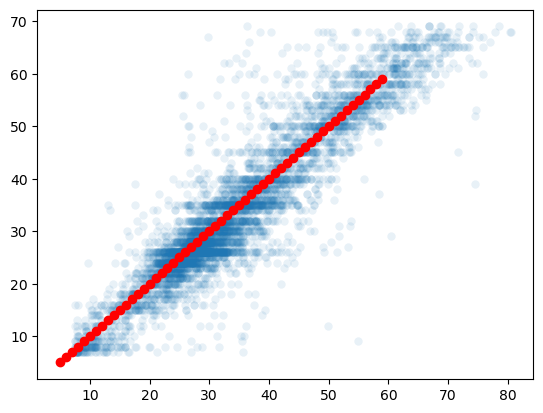

INFO:tensorflow:Assets written to: 15_model.pkl/assets


INFO:tensorflow:Assets written to: 15_model.pkl/assets


Epoch 1/4
62/62 [==============================] - 35s 574ms/step - loss: 39.2010 - val_loss: 84.6146
Epoch 2/4
62/62 [==============================] - 35s 564ms/step - loss: 32.2845 - val_loss: 85.4946
Epoch 3/4
62/62 [==============================] - 32s 522ms/step - loss: 29.1803 - val_loss: 86.3397
Epoch 4/4
62/62 [==============================] - 33s 528ms/step - loss: 26.5207 - val_loss: 88.4259
Epoch 1/4
62/62 [==============================] - ETA: 0s - loss: 34.9514

KeyboardInterrupt: 

In [5]:
results = dict()
c = 0
while True:
    for i in range(4):
        images = load(f"{i}_images.joblib")
        ages = load(f"{i}_ages.joblib")

        results[f"{c}_{i}_0"] = model.fit(images, ages[:, None], epochs=4, batch_size=64,
                                        validation_split=0.2, use_multiprocessing=True, verbose=1)
                
        # results[f"{c}_{i}_1"] = model.fit(images[:, ::-1], ages[:, None], epochs=4, batch_size=64,
        #                         validation_split=0.2, use_multiprocessing=True, verbose=1)
        
        results[f"{c}_{i}_2"] = model.fit(images[:, :, ::-1], ages[:, None], epochs=4, batch_size=64,
                                validation_split=0.2, use_multiprocessing=True, verbose=1)
        
        # results[f"{c}_{i}_3"] = model.fit(images[:, ::-1, ::-1], ages[:, None], epochs=4, batch_size=64,
        #                         validation_split=0.2, use_multiprocessing=True, verbose=1)
        
        pred = model.predict(images).flatten()

        plt.scatter(pred, ages, alpha=0.1, lw=0)
        plt.scatter(list(range(5,60)), list(range(5,60)), color='red')
        plt.show()
        
        del images
        del ages
        
        model.save(f'{c}_model.pkl')
    c += 1